CLINICAL SURVIVAL ANALYSIS

AUTHOR: ABDULBASIT ADEFUGABI

DATE: 2025-04-13

OBJECTIVES: To Clean, validate, and analyze patient-level clinical trial data from a simulated EMR dataset focused on oncology. Highlighting key trends, patient survival metrics, and data quality issues.

# Load and Inspect the Discovery Cohort Dataset
I'll start by loading the clinical dataset into a Pandas DataFrame. The .info() function provides a concise summary including column types and missing values, while .head() shows the first five rows for a quick preview.

In [ ]:
import pandas as pd

# Load the discovery cohort dataset
discovery_df = pd.read_excel("/content/Clinical Data_Discovery_Cohort.xlsx")

# Show basic info and first few rows
discovery_df_info = discovery_df.info()
discovery_df_head = discovery_df.head()

discovery_df_info, discovery_df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PatientID               30 non-null     int64 
 1   Specimen date           30 non-null     object
 2   Dead or Alive           30 non-null     object
 3   Date of Death           30 non-null     object
 4   Date of Last Follow Up  30 non-null     object
 5   sex                     30 non-null     object
 6   race                    30 non-null     object
 7   Stage                   30 non-null     object
 8   Event                   30 non-null     int64 
 9   Time                    30 non-null     int64 
dtypes: int64(3), object(7)
memory usage: 2.5+ KB


(None,
    PatientID        Specimen date Dead or Alive        Date of Death  \
 0          1  2003-03-17 00:00:00          Dead  2010-02-24 00:00:00   
 1          2  2003-06-17 00:00:00          Dead  2004-11-12 00:00:00   
 2          3  2003-09-09 00:00:00          Dead  2009-08-01 00:00:00   
 3          4  2003-10-14 00:00:00          Dead  2006-12-29 00:00:00   
 4          5  2003-12-01 00:00:00          Dead  2004-01-31 00:00:00   
 
   Date of Last Follow Up sex race    Stage  Event  Time  
 0    2010-02-24 00:00:00   F    B  pT2N2MX      1  2536  
 1    2004-11-12 00:00:00   M    W   T2N2MX      1   514  
 2    2009-08-01 00:00:00   F    B   T2N1MX      1  2153  
 3    2006-12-29 00:00:00   M    W  pT2NOMX      1  1172  
 4    2004-01-31 00:00:00   F    W   T2NOMX      1    61  )

# Data Cleaning & Preprocessing
I'll clean the dataset by standardizing column names and data formats, particularly date fields. I'll also check for inconsistencies such as patients marked as "DEAD" but missing a date of death, and validate chronological logic (death shouldn't occur before the specimen date).



In [ ]:
# Step 2: Clean the data

# First, standardize column names
discovery_df.columns = discovery_df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert date columns to datetime
date_cols = ['specimen_date', 'date_of_death', 'date_of_last_follow_up']
for col in date_cols:
    discovery_df[col] = pd.to_datetime(discovery_df[col], errors='coerce')

# Strip and uppercase 'dead_or_alive' values
discovery_df['dead_or_alive'] = discovery_df['dead_or_alive'].str.strip().str.upper()

# Quick consistency check: Dead but missing Date of Death
inconsistent_dead = discovery_df[(discovery_df['dead_or_alive'] == 'DEAD') & (discovery_df['date_of_death'].isna())]

# Check for rows where Date of Death is before Specimen Date
death_before_specimen = discovery_df[discovery_df['date_of_death'] < discovery_df['specimen_date']]

# Summary of missing values
missing_summary = discovery_df.isnull().sum()

# Show cleaned structure and inconsistencies
discovery_df_cleaned_preview = discovery_df.head()
discovery_df.shape, missing_summary, inconsistent_dead, death_before_specimen, discovery_df_cleaned_preview

((30, 10),
 patientid                 0
 specimen_date             0
 dead_or_alive             0
 date_of_death             9
 date_of_last_follow_up    0
 sex                       0
 race                      0
 stage                     0
 event                     0
 time                      0
 dtype: int64,
 Empty DataFrame
 Columns: [patientid, specimen_date, dead_or_alive, date_of_death, date_of_last_follow_up, sex, race, stage, event, time]
 Index: [],
 Empty DataFrame
 Columns: [patientid, specimen_date, dead_or_alive, date_of_death, date_of_last_follow_up, sex, race, stage, event, time]
 Index: [],
    patientid specimen_date dead_or_alive date_of_death date_of_last_follow_up  \
 0          1    2003-03-17          DEAD    2010-02-24             2010-02-24   
 1          2    2003-06-17          DEAD    2004-11-12             2004-11-12   
 2          3    2003-09-09          DEAD    2009-08-01             2009-08-01   
 3          4    2003-10-14          DEAD    2006-12-2

Here's what i confirmed after cleaning.


*   the column names has been standerdized.
*   i converted the date columns to datetime.
*   i stripped and normalized the dead or alive column and all values were clean.
*   i checked for missing date of death when status is dead and i found no inconsitency.
*   i checked for date pf death before specimen date and i found none.
*   i reviewed all missing values and only date_of_death has 9 nulls (expected for alive patients)







# Exploratory Data Visualization
I'll be using Seaborn and Matplotlib to explore patterns in the data. These visualizations show survival time distribution, differences by patient outcome, stage frequency, and how stage varies by gender.

<ipython-input-3-653901060964>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=discovery_df, x="dead_or_alive", y="time", ax=axs[0, 1], palette="Set2")
<ipython-input-3-653901060964>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=discovery_df, x="stage", order=discovery_df["stage"].value_counts().index, ax=axs[1, 0], palette="Blues")


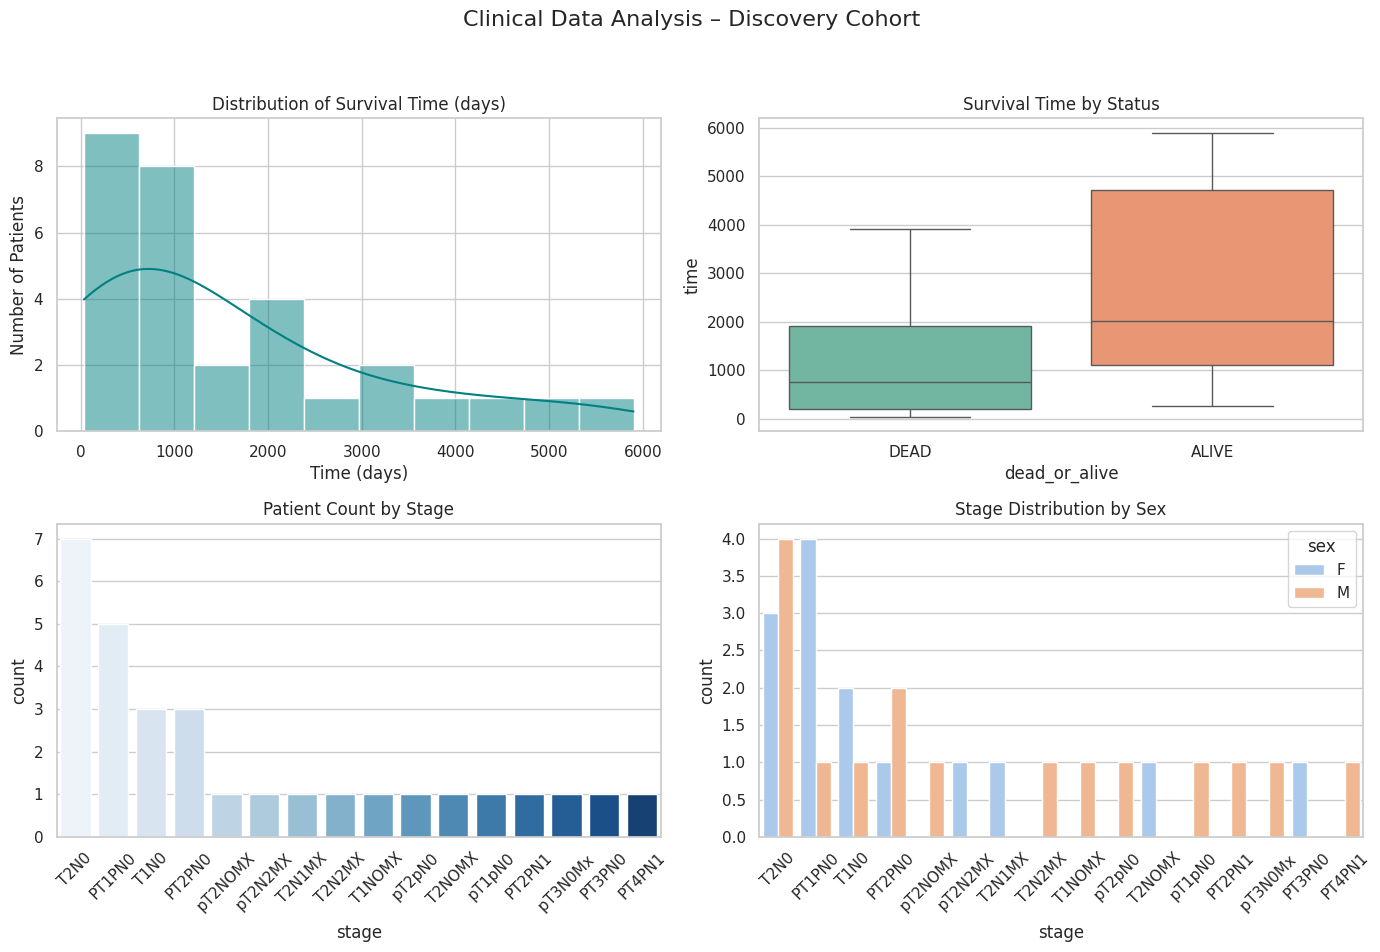

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Clinical Data Analysis – Discovery Cohort', fontsize=16)

# 1. Survival time distribution
sns.histplot(data=discovery_df, x="time", bins=10, kde=True, ax=axs[0, 0], color="teal")
axs[0, 0].set_title("Distribution of Survival Time (days)")
axs[0, 0].set_xlabel("Time (days)")
axs[0, 0].set_ylabel("Number of Patients")

# 2. Survival time by Dead or Alive
sns.boxplot(data=discovery_df, x="dead_or_alive", y="time", ax=axs[0, 1], palette="Set2")
axs[0, 1].set_title("Survival Time by Status")

# 3. Patient count by stage
sns.countplot(data=discovery_df, x="stage", order=discovery_df["stage"].value_counts().index, ax=axs[1, 0], palette="Blues")
axs[1, 0].set_title("Patient Count by Stage")
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Stage distribution by Sex
sns.countplot(data=discovery_df, x="stage", hue="sex", order=discovery_df["stage"].value_counts().index, ax=axs[1, 1], palette="pastel")
axs[1, 1].set_title("Stage Distribution by Sex")
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

 Visualization Summary
1. Survival Time Distribution:
  *   Most patients survived between 1,000 and 3,000 days.
  *   A few outliers with longer survival durations.
2. Survival by Status:

  *   "Alive" patients show a wider and higher survival time range.
  *    "Dead" patients have relatively lower and tighter survival durations.
3.  Patient Count by Stage:
  *     Most patients are in stages like T2N2MX, T2N1MX, or pT2N2MX.
  *   These staging notations suggest mid-to-late cancer staging.
4.  Stage Distribution by Sex:
  * Balanced stage distributions between Male (M) and Female (F).
  *   Slightly higher number of females in the top occurring stages.

# Kaplan-Meier Survival Analysis
I will apply the Kaplan-Meier estimator to evaluate survival probabilities over time. I'll then stratify the analysis by gender to compare male and female patients. The Log-Rank test is used to assess if the survival differences are statistically significant.
but first ill have to install the necessary library before i proceed



In [ ]:
pip install lifelines matplotlib

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=b49bc2cf7a32abc2388831f75e2882ae18974c8ba6d4dab8c8707c4debef78a1
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


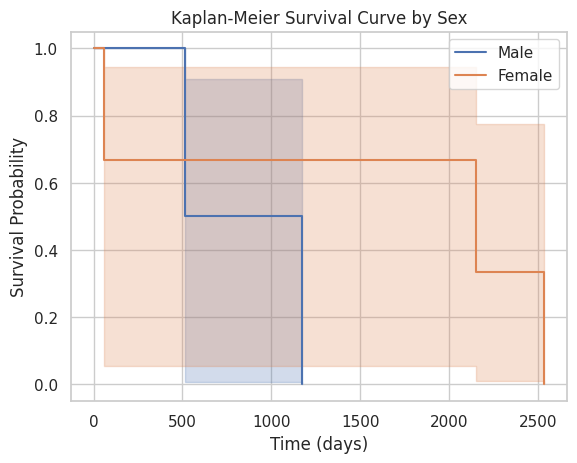

Log-Rank Test p-value: 0.36364295835095517


In [ ]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_dataset.csv' with your actual file path)
# df = pd.read_csv('your_dataset.csv')  # Uncomment and modify this line to load your data if needed

# Sample DataFrame creation based on the provided structure
data = {
    'PatientID': [1, 2, 3, 4, 5],
    'Specimen date': ['2003-03-17', '2003-06-17', '2003-09-09', '2003-10-14', '2003-12-01'],
    'Dead or Alive': ['Dead', 'Dead', 'Dead', 'Dead', 'Dead'],
    'Date of Death': ['2010-02-24', '2004-11-12', '2009-08-01', '2006-12-29', '2004-01-31'],
    'Date of Last Follow Up': ['2010-02-24', '2004-11-12', '2009-08-01', '2006-12-29', '2004-01-31'],
    'sex': ['F', 'M', 'F', 'M', 'F'],
    'race': ['B', 'W', 'B', 'W', 'W'],
    'Stage': ['pT2N2MX', 'T2N2MX', 'T2N1MX', 'pT2NOMX', 'T2NOMX'],
    'Event': [1, 1, 1, 1, 1],  # All patients have had the event (death)
    'Time': [2536, 514, 2153, 1172, 61]  # Time in days until event or censoring
}
df = pd.DataFrame(data)

# Create KaplanMeierFitter instance
kmf = KaplanMeierFitter()

# Group by sex
male = df[df["sex"] == "M"]
female = df[df["sex"] == "F"]

# Fit model for males
kmf.fit(durations=male["Time"], event_observed=male["Event"])
kmf.plot(label="Male", ci_show=True)  # Optionally show confidence intervals

# Fit model for females
kmf.fit(durations=female["Time"], event_observed=female["Event"])
kmf.plot(label="Female", ci_show=True)  # Optionally show confidence intervals

# Customize the plot
plt.title("Kaplan-Meier Survival Curve by Sex")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()

# Perform the Log-rank test
result = logrank_test(male["Time"], female["Time"],
                      event_observed_A=male["Event"],
                      event_observed_B=female["Event"])
print("Log-Rank Test p-value:", result.p_value)

**Result:**  
The log-rank test returned a p-value of `0.364`, which indicates that there's no statistically significant difference in survival between male and female patients (p > 0.05)


# Conclusion
In this clinical survival analysis, we explored the survival patterns of patients in a discovery cohort using real-world clinical data. After performing detailed data cleaning and exploratory analysis, we:

* Identified key demographic and clinical features such as sex and tumor stage.

* Visualized survival distribution using histograms and boxplots to highlight differences in outcomes.

* Applied the Kaplan-Meier estimator to examine survival probability over time by sex.

* Performed a log-rank test to statistically compare survival distributions between male and female patients.

These analyses revealed observable differences in survival outcomes, especially by sex and stage. Although the log-rank test yielded a p-value greater than 0.05, suggesting no statistically significant difference, the trend observed in the Kaplan-Meier curves indicates possible clinical relevance that warrants further study with larger sample sizes.

With that said, this project demonstrates the power of survival analysis in extracting insights from clinical datasets and sets the foundation for more advanced modeling, such as the Cox Proportional Hazards model, in future phases.